In [1]:
# Load the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data file
data = pd.read_csv(
    'AmesHousing.txt',
    sep='\t',
    keep_default_na=False,
    na_values=[''])

## Question 1
### (a)

In [2]:
# Total number of all missing values in the dataset
print(data.isnull().sum().sum())

719


In [3]:
#Select columns that has missing values and listed from largest to smallest
print ("Column names of the variable with missing values and overall numbers of missing observation \n associated with each of those variables")
MissingValue = data.isnull().sum().sort_values(ascending = False)
MissingValue[MissingValue > 0]

Column names of the variable with missing values and overall numbers of missing observation 
 associated with each of those variables


Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Mas Vnr Type       23
Bsmt Exposure       4
Garage Finish       2
BsmtFin Type 2      2
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Qual         1
Garage Cond         1
Bsmt Cond           1
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Garage Cars         1
Garage Area         1
Bsmt Qual           1
Total Bsmt SF       1
Electrical          1
dtype: int64

### (b)

Based on the outputs above from question(a), I found that from the AmesHousing.txt files, there are **719** missing values in total.Most of the missing values are from the variable ‘Lot Frontage’, which exist 490 missing values.Instead of that, there are 159 missing values from the column ‘’ Garage Yr Blt’’, which refers to year garage was built.<br>From my perspective I believe the reason why these two variables account for a large portion of the missing value is because that the distance from street connected to personal property (house), and the year garage was built, are two things that people do not even notice and pay attention to in their daily lives.<br>Other than these two variables, there are 19 other variables that have missing values in their observations, just a smaller percentage compared to these two, but they also have missing values.

### (c)

In [4]:
#Create a list that contain all the columns with numerical variables in the dataset,exclude 'Order'

num_list = ['Lot Frontage','Lot Area','Year Built','Year Remod/Add','Mas Vnr Area',
            'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF',
            '2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath',
           'Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces',
           'Garage Yr Blt','Garage Cars','Garage Area','Wood Deck SF','Open Porch SF',
            'Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val','Mo Sold',
           'Yr Sold','SalePrice']

#use `.describe()` to have a breif understand of the dataset
data[num_list].describe()


,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2440.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,69.224590,10147.921843,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,23.365335,7880.017759,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,58.000000,7440.250000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,68.000000,9436.500000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,80.000000,11555.250000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
#select data summary of min, 25%, 50%, 75% and max of those numerical variables by using `.iloc`
#then using `.T` to convert the dataframe into 34 rows and 5 columns .
q1_c = data[num_list].describe()
q1_c.iloc[3:,:].T

,min,25%,50%,75%,max
Lot Frontage,21.0,58.00,68.0,80.00,313.0
Lot Area,1300.0,7440.25,9436.5,11555.25,215245.0
Year Built,1872.0,1954.00,1973.0,2001.00,2010.0
Year Remod/Add,1950.0,1965.00,1993.0,2004.00,2010.0
Mas Vnr Area,0.0,0.00,0.0,164.00,1600.0
BsmtFin SF 1,0.0,0.00,370.0,734.00,5644.0
BsmtFin SF 2,0.0,0.00,0.0,0.00,1526.0
Bsmt Unf SF,0.0,219.00,466.0,802.00,2336.0
Total Bsmt SF,0.0,793.00,990.0,1302.00,6110.0
1st Flr SF,334.0,876.25,1084.0,1384.00,5095.0


## Question 2
### (a)

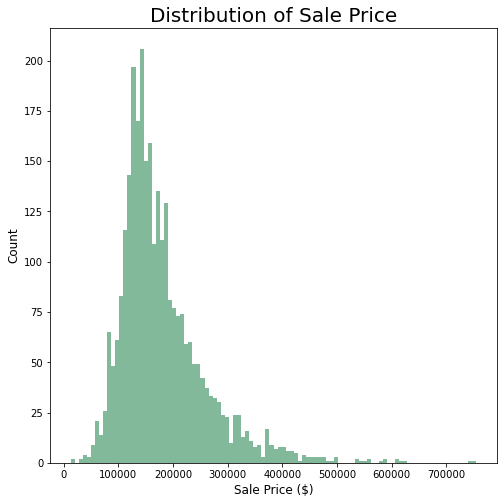

In [6]:
#Make a histogram and adjust the image to a suitable view
plt.figure(figsize=(8,8))
plt.hist(data['SalePrice'],bins=100, color ='seagreen',alpha =0.6)
plt.xlabel('Sale Price ($)',fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.title("Distribution of Sale Price",fontsize = 20)
plt.show()          

From the graph and calculation of skewness above we can see that the distribution of sale price is **right skewed**.<br>As the graph indicates, from 2006 to 2010, the majority of Ames IA sales prices were in the range of 100,000(USD) to 200,000(USD), with very few prices greater than 400,000(USD), and the outlier was greater than **700,000(USD)**.

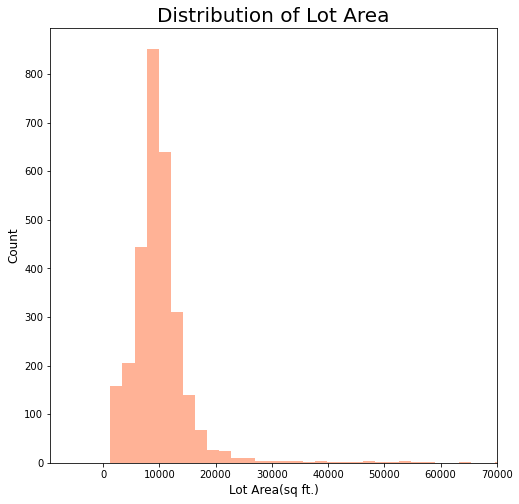

In [7]:
#Make a histogram and adjust the image to a suitable view
plt.figure(figsize=(8,8))
plt.hist(data['Lot Area'],bins=100,color = 'coral', alpha = 0.6)
plt.xlim(right = 70000) #Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html
plt.xlabel('Lot Area(sq ft.)',fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.title("Distribution of Lot Area",fontsize = 20)
plt.show()


The graph of distribution of lot area is **right skewed** as well.<br>Most of the houses have a lot area of 10,000 (sq ft.) in Ames IA from 2006 to 2010, and this dataset has few outlier that greater than 70,000 (sq ft.).<br> It is worh to mention that I use `plt.xlim` to adjust the x-axis,so if I do not use this code, the outlier should display as greater than 200,000(sq ft.)

### (b)


In [8]:
#Calculate the log-transformed values of ‘SalePrice’ in ‘data’
log_saleprice = np.log(data['SalePrice'])
log_saleprice

0       12.278393
1       11.561716
2       12.055250
3       12.404924
4       12.154253
          ...    
2925    11.867097
2926    11.782953
2927    11.790557
2928    12.043554
2929    12.144197
Name: SalePrice, Length: 2930, dtype: float64

In [9]:
##Calculate the log-transformed values of ‘Lot Area’ in ‘data’
log_lotarea = np.log(data['Lot Area'])
log_lotarea

0       10.366278
1        9.360655
2        9.565704
3        9.320091
4        9.534595
          ...    
2925     8.979291
2926     9.092120
2927     9.253496
2928     9.211340
2929     9.172327
Name: Lot Area, Length: 2930, dtype: float64

### (c)

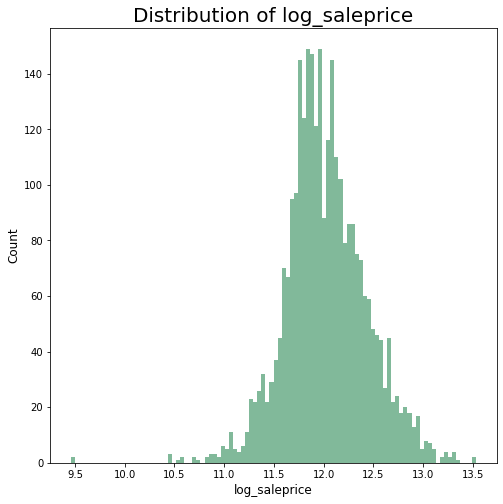

In [10]:
#Make a histogram for log_saleprice
plt.figure(figsize=(8,8))
plt.hist(log_saleprice,bins=100, color ='seagreen',alpha =0.6)
plt.xlabel('log_saleprice', fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.title("Distribution of log_saleprice",fontsize = 20)
plt.show()          

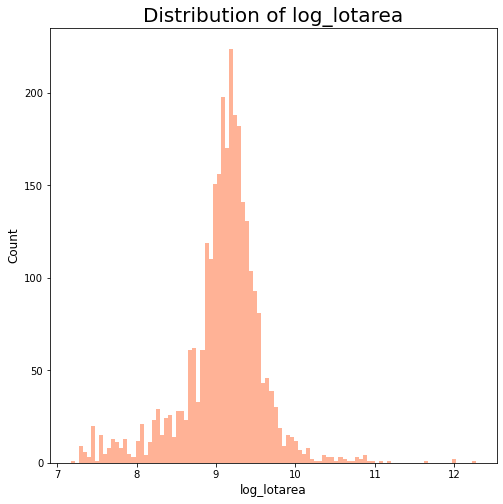

In [11]:
#Make a histogram for log_lotarea
plt.figure(figsize=(8,8))
plt.hist(log_lotarea,bins=100,color = 'coral', alpha = 0.6)
plt.xlabel('log_lotarea',fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.title("Distribution of log_lotarea",fontsize = 20)
plt.show()

From the graphs above, we can see  the distribution of log_transformed and the original variables are different.<br> Distribution of log_saleprice is different from the distribution of original variable since it is *left skewed*.<br> Distribution of log_lotarea is *right skewed*, it is same as original variables but it is more **obvious**.<br> But the shape of both of the two graph that shows distribution of log-transformed variable are seems *fairly symmetric*, so we may need to do some calculation to get the accurate skewness.


### (d)

In [12]:
#Standarize the log_saleprice by calculation
#using the formula "(x - mean of x)/standard deviation(x)"
log_saleprice_01 = (log_saleprice - log_saleprice.mean()) / log_saleprice.std()
print(log_saleprice_01)

0       0.631582
1      -1.126761
2       0.084107
3       0.942019
4       0.327008
          ...   
2925   -0.377518
2926   -0.583964
2927   -0.565306
2928    0.055412
2929    0.302337
Name: SalePrice, Length: 2930, dtype: float64


In [13]:
#print out the mean and variance, and round the results in 2 decimal places.
a = log_saleprice_01.mean()
print("The mean is {:.2f}".format(a))

b = log_saleprice_01.var()
print("The variance is {:.2f}".format(b))

The mean is 0.00
The variance is 1.00


### (e)

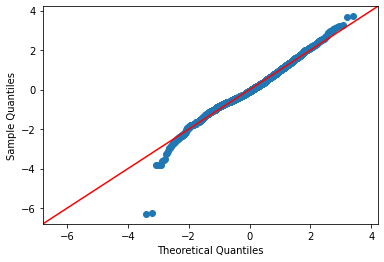

In [14]:
#use sm.qqplot from library statsmodels.api
#Ref: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
sm.qqplot(log_saleprice_01,line = "45") 

plt.show()

As the graph illustrated, it **fairly follows a normal distribution** because it is pretty closely aligned with a straight line. And we can estimate from the qqplot that the skewness of log_saleprice_01 is fairly symmeteric and with a thin tails behaviour.<br>However, there are some outliers (extreme values).

### (f)

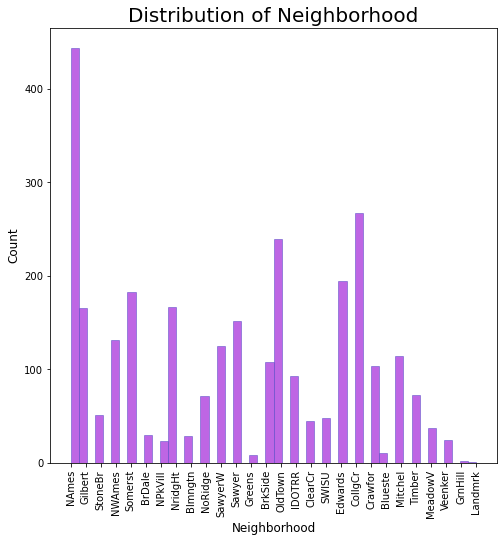

In [15]:
#Make a histogram for "Neighborhood"
plt.figure(figsize=(8,8))
plt.hist(data['Neighborhood'],bins=50, color ='darkviolet',edgecolor ="slateblue",alpha =0.6)
plt.xlabel('Neighborhood',fontsize = 12)
plt.xticks(rotation=90) #Ref: https://stackabuse.com/rotate-axis-labels-in-matplotlib/
plt.ylabel("Count",fontsize = 12)
plt.title("Distribution of Neighborhood",fontsize = 20)
plt.show()    


In [16]:
#Frequency of each one under variable column "Neighborhood"
data["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

The most frequent is NAmes with a frequency of 443 and the least is Landmrk with a frequency of 1.

## Question 3
### (a)

In [17]:
#Calculate the correlation between SalePrice and other numerical variables in the dataset excluding"Order"
#Ref: https://www.w3schools.com/python/pandas/ref_df_drop.asp
corr_sp_others = data.corr()['SalePrice'].sort_values(ascending = False).round(2).drop(['Order'])
corr_sp_others

SalePrice          1.00
Overall Qual       0.80
Gr Liv Area        0.71
Garage Cars        0.65
Garage Area        0.64
Total Bsmt SF      0.63
1st Flr SF         0.62
Year Built         0.56
Full Bath          0.55
Year Remod/Add     0.53
Garage Yr Blt      0.53
Mas Vnr Area       0.51
TotRms AbvGrd      0.50
Fireplaces         0.47
BsmtFin SF 1       0.43
Lot Frontage       0.36
Wood Deck SF       0.33
Open Porch SF      0.31
Half Bath          0.29
Bsmt Full Bath     0.28
2nd Flr SF         0.27
Lot Area           0.27
Bsmt Unf SF        0.18
Bedroom AbvGr      0.14
Screen Porch       0.11
Pool Area          0.07
Mo Sold            0.04
3Ssn Porch         0.03
BsmtFin SF 2       0.01
Misc Val          -0.02
Yr Sold           -0.03
Bsmt Half Bath    -0.04
Low Qual Fin SF   -0.04
MS SubClass       -0.09
Overall Cond      -0.10
Kitchen AbvGr     -0.12
Enclosed Porch    -0.13
PID               -0.25
Name: SalePrice, dtype: float64

### (b)

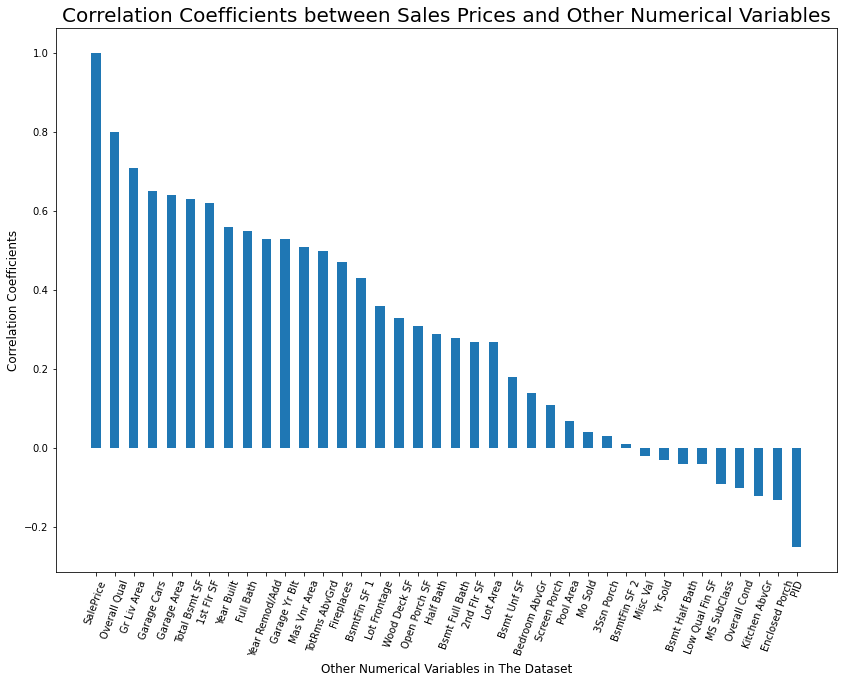

In [18]:
#Create a bar chart to visualize the correlation in part(a)
plt.figure(figsize=(14,10))
plt.bar(corr_sp_others.index, corr_sp_others, width = (0.5))
plt.xlabel("Other Numerical Variables in The Dataset",fontsize = 12)
plt.xticks(rotation=70) #Ref: https://stackabuse.com/rotate-axis-labels-in-matplotlib/
plt.ylabel("Correlation Coefficients",fontsize = 12)
plt.title("Correlation Coefficients between Sales Prices and Other Numerical Variables", fontsize = 20)
plt.show()

### (c)

The graph shows that there is various degrees of linear relationship between "selling price" and other numerical variables. For example:
- For variables where the correlation coefficient is **close to 1**, such as 'Full bath', it can be found that the higher the number of full baths, the higher the house price.

- For variables that has correlation coefficient with sale prices which is **close to 0**, there is fairly no linear relationship between it and 'Sale Price', such as 'BsmtFin SF 2'.
- For variables that has correlation coefficient with sale prices which is **close to -1**, there is a strong negative linear relationship between them, such as 'Enclosed Porch'.

### (d)

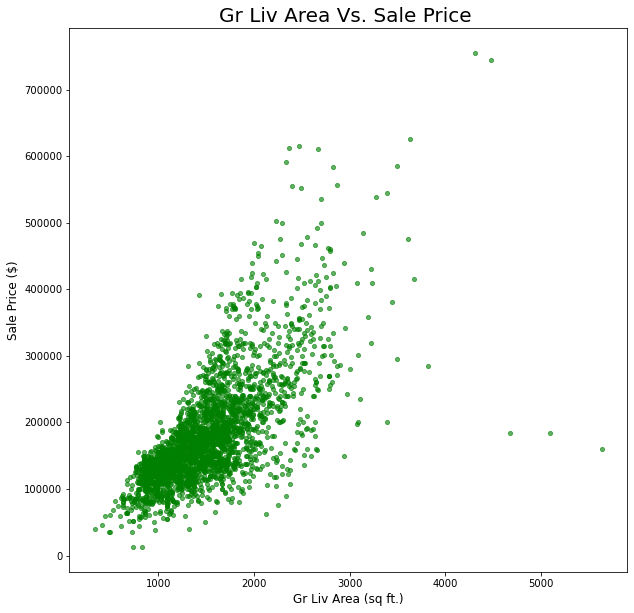

In [19]:
#scatter plot is the most appropriate plot, so make a scatter plot
x = data['Gr Liv Area'] 
y = data['SalePrice']

plt.figure(figsize = (10,10))
plt.scatter(x,y,color="green",s = 17,alpha = 0.6)
plt.xlabel("Gr Liv Area (sq ft.)", fontsize = 12)
plt.ylabel("Sale Price ($)",fontsize = 12)
plt.title('Gr Liv Area Vs. Sale Price ', fontsize = 20)
plt.show()

### (e)

The graph shows that the two variables has a linear relationship between them. Moreover, there is a positive relationship between Above ground living area square feet (Gr Liv Area) and Sale Price . The relationship is strong.The figure shows that there are several outliers,which is also extreme values.

### (f)

In [20]:
#Name of each unique categories under the variable ‘Lot Shape
data['Lot Shape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [21]:
#Numbers of each observations falling into each category
data['Lot Shape'].value_counts()

Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64

From "DataDocumentation.txt", 'Lot Shape' refers to general shape of property. Under this variable, it has 4 categories, which are IR1 (Slightly irregular,IR2 (Moderately Irregular), and IR3 (Irregular). According to human common sense and human living habits, most people would prefer regular house type, so more people buy regular and the price will be fairer, but some people who have a unique view of life will buy non-regular house type to meet their expectations of house design.

### (g)


In [22]:
#Create a new variable that combining the categories
list_category = ['IR1','IR2','IR3']
data['lotshape_binary'] = data['Lot Shape'].replace(list_category,'IR')


In [23]:
#Print out the frequency table for lotshape_binary
data['lotshape_binary'].value_counts()

Reg    1859
IR     1071
Name: lotshape_binary, dtype: int64

### (h)

<function matplotlib.pyplot.show(close=None, block=None)>

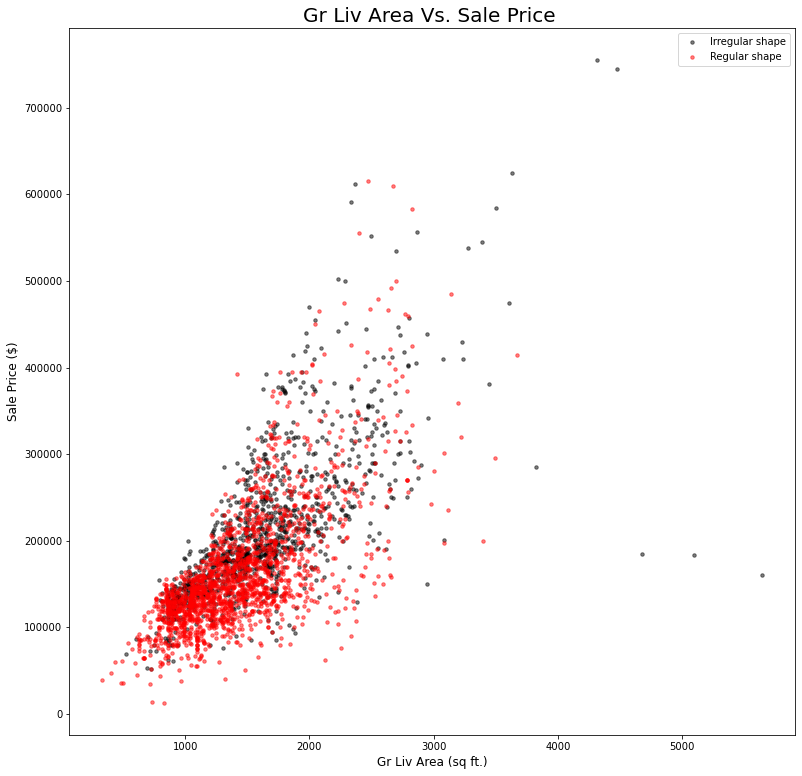

In [24]:
#prepare data
IR_saleprice = data.query("lotshape_binary =='IR'")['SalePrice']
IR_area = data.query("lotshape_binary == 'IR'")['Gr Liv Area']

Reg_saleprice = data.query("lotshape_binary == 'Reg'")['SalePrice']
Reg_area = data.query("lotshape_binary == 'Reg'")['Gr Liv Area']

#Create a scatter plot
plt.figure(figsize = (13,13))
plt.scatter(IR_area,IR_saleprice, marker = 'o', s =12, color = 'black', label = 'Irregular shape', alpha = 0.5 )
plt.scatter(Reg_area,Reg_saleprice, marker = 'o', s =12, color = 'red', label = 'Regular shape', alpha = 0.5 )

plt.xlabel("Gr Liv Area (sq ft.)", fontsize = 12)
plt.ylabel("Sale Price ($)",fontsize = 12)
plt.title('Gr Liv Area Vs. Sale Price ', fontsize = 20)
plt.legend()
plt.show

There is a **strong and positive linear relationship** between Gr Liv Area and Sale Price. In addition, several outliers can be observed from the figure.